Coefficients Linear Regression:  [953.36]
Intercept Linear Regression:  152.28
R2 score Linear: 0.38
Mean absolute error Linear: 50.94
Mean squared error Linear: 3752.77


Coefficients regr2 Polynomial degree: 2 
 ax+bx^2+cx^3...
[   0.    916.2  1597.69]
Intercept regr2 Polynomial:  148.82
R2 score Poly: 0.36
Mean squared error Polynomial: 3882.48
Mean absolute error Polynomial: 51.62


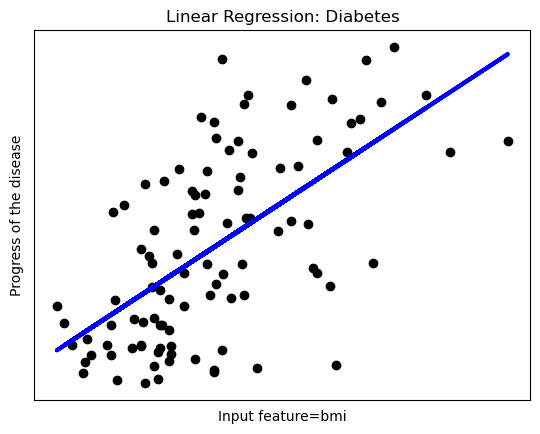

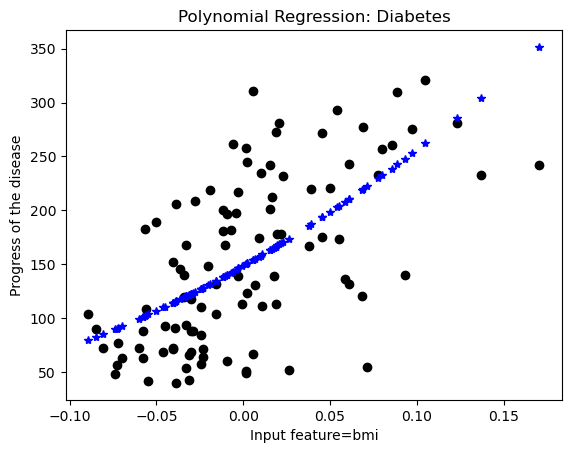

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

#diabetes.feature_names
#['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
#diabes.DESCR
#bp= blood presure, and 6 blood serum movements
#predict disease progressing one year after base line


# Use only one feature
featureNumber=2#8
diabetes_X = diabetes.data[:,  featureNumber].reshape(-1,1)

# Split the data into training/testing sets
nTest=100
diabetes_X_train = diabetes_X[:-nTest]
diabetes_X_test = diabetes_X[-nTest:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-nTest]
diabetes_y_test = diabetes.target[-nTest:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Create a polynomial-regression object
# Observe that it is idendical to the linear reger.
regr2 = linear_model.LinearRegression()

# Uncomment one of the following lines to see the effect
# of regularization
#regr2 = Ridge(alpha=2)
#regr2=Lasso(alpha=0.01)


#This creates the features for the polynomial
#degree=2 defines the max degree of the polynmial
polyDegree = 2
poly = PolynomialFeatures(degree=polyDegree)


#transform the data to make the suitable for polynomial regression

#[1, a, b, a^2, ab, b^2] that's the polynomial

# if you have 1 feature then: 
# 1, a, a^2, a^3 : for a 3rd degree polynomial

#                   one input feature--> resulting features
# Polynomial degree 1:  a-->  [1,a]
# Polynomial degree 2:  a-->  [1,a, a^2]
# Polynomial degree 3:  a-->  [1,a, a^2, a^3]


a=poly.fit_transform(diabetes_X_train)

a2=poly.fit_transform(diabetes_X_test)


# Training
# Linear regression 
regr.fit(diabetes_X_train, diabetes_y_train)

# Training
# Create a polynomial-regression object
regr2.fit(a, diabetes_y_train)


# Make predictions using the testing set, linear
diabetes_y_pred = regr.predict(diabetes_X_test)

# Make predictions using the testing set, polynomial
diabetes_y_pred_poly = regr2.predict(a2)


# The coefficients
print ('Coefficients Linear Regression: ', np.round(regr.coef_,2))
print ('Intercept Linear Regression: ', round(regr.intercept_,2))

# The mean squared error
"Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred)
# Explained variance score: 1 is perfect prediction
print ('R2 score Linear: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
print ("Mean absolute error Linear: %.2f" % mean_absolute_error(diabetes_y_test, diabetes_y_pred))
print ("Mean squared error Linear: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))


regr.intercept_
regr.coef_


# Plot linear

# Plot outputs
plt.figure(1)
plt.title('Linear Regression: Diabetes')
plt.ylabel('Progress of the disease')
plt.xlabel('Input feature='+diabetes.feature_names[featureNumber])
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())


# Display The coefficients
print ('\n')
print ('Coefficients regr2 Polynomial degree:',polyDegree,'\n' ,"ax+bx^2+cx^3...")
print ( np.round(regr2.coef_,2))
print ('Intercept regr2 Polynomial: ', round(regr2.intercept_,2))

print ('R2 score Poly: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred_poly))
# The mean squared error
print ("Mean squared error Polynomial: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred_poly))
# Explained variance score: 1 is perfect prediction
print ("Mean absolute error Polynomial: %.2f" % mean_absolute_error(diabetes_y_test, diabetes_y_pred_poly))



# Plot polynomial
plt.figure(2)
plt.title('Polynomial Regression: Diabetes')
plt.ylabel('Progress of the disease')
plt.xlabel('Input feature='+diabetes.feature_names[featureNumber])
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred_poly,'*', color='blue')

plt.show()


In [3]:
a

array([[ 1.00000000e+00,  6.16962065e-02,  3.80642190e-03],
       [ 1.00000000e+00, -5.14740612e-02,  2.64957898e-03],
       [ 1.00000000e+00,  4.44512133e-02,  1.97591037e-03],
       ...,
       [ 1.00000000e+00, -7.28376621e-03,  5.30532502e-05],
       [ 1.00000000e+00, -1.37506387e-02,  1.89080063e-04],
       [ 1.00000000e+00,  5.95405824e-02,  3.54508095e-03]])

In [4]:
a.shape
#It has 3 columns/// 1st column is intercet and other are the degrees

(342, 3)